Example OF change image to array 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.image import imread
import pandas as pd
from pathlib import Path
import cv2
import os
from numpy import array
from math import *

## Extract the Matrix From Video by frames

In [46]:
# Open the video file
cap = cv2.VideoCapture("E:\Math_494\Assignments\monte_carlo_low.mp4")

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error opening video file")

# Read the frames from the video file and store them in a list
frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale and add it to the list of frames
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    frames.append(gray.flatten())

# Release the video file
cap.release()
X = np.array(frames)

In [48]:
X.shape

(379, 518400)

In [50]:
## transpose the matrix in terms of 379 Columns and 518400 rows
rvideo = (np.reshape(X,(379,518400))).transpose() 

(379, 518400)

## Compute DMD matrix Y = A*X by A = Y * (pesduo-inverse of X) 

In [51]:
x=rvideo[:,:378] ## x (m-1) Matrix
Y=rvideo[:,1:379]  ## x Matrix
x.shape

(518400, 378)

In [52]:
## Use SVD Convert X to X'
U,S,VT = np.linalg.svd(x,full_matrices=False)

In [53]:
## diagonlaize Singular values
S = np.diag(S)

In [54]:
r = 170   ##truncate at 99
U=U[:,:r]
S=S[:r,:r]
VT=VT[:r,:]

In [55]:
## Transpose U to U*
U = np.matrix(U)
UT = U.getH()

In [56]:
##Compute x1 = UT.x
x1=UT.dot(x)
x1.shape

(170, 378)

In [57]:
## use same idea calculate Y
U1,S1,VT1 = np.linalg.svd(Y,full_matrices=False)

In [58]:
## diagonlaize Singular values of Y
S1 = np.diag(S1)

In [59]:
r = 170   ##truncate at 99
U1=U1[:,:r]
S1=S1[:r,:r]
VT1=VT1[:r,:]

In [60]:
## Transpose U to U*
U1 = np.matrix(U1)
UT1 = U1.getH()

In [61]:
##Compute Y1 = UT1.Y
Y1=UT1.dot(Y)
Y1.shape

(170, 378)

In [62]:
##Compute DMD A = Y1 * (pesduo-inverse of X1)
A=Y1.dot(np.linalg.pinv(x1))
A.shape

(170, 170)

In [63]:
eigenvalues, eigenvectors = np.linalg.eig(A)
modes = np.dot(U, eigenvectors)

In [36]:
x11=np.diag(eigenvalues[np.abs(eigenvalues) < threshold])
x11.shape

(82, 82)

In [66]:
type(background_frames)

NameError: name 'background_frames' is not defined

In [37]:
background_modes.shape

(518400, 82)

C:\Users\yifan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


<function matplotlib.pyplot.show(close=None, block=None)>

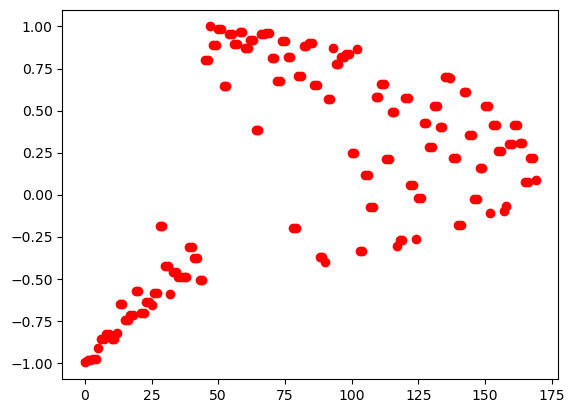

In [29]:
plt.plot(eva,'ro')
plt.show

In [30]:
# ll=[]
# eva1 =eva.tolist()
# for i in eva:
#     if i>0:
#         ll.append(i)
# len(ll)

103

In [67]:
eva = np.diag(eva)
eva1=eva.real
eva2=eva.imag

In [48]:
eva1 = np.diag(eva1)
eva2 = np.diag(eva2)

In [69]:
dt = 1
omega = np.log(eva)/1
omega2 = np.abs(np.log(eva)/1)

C:\Users\yifan\AppData\Local\Temp\ipykernel_22536\3457643766.py:2: RuntimeWarning: divide by zero encountered in log
  omega = np.log(eva)/1
C:\Users\yifan\AppData\Local\Temp\ipykernel_22536\3457643766.py:2: RuntimeWarning: invalid value encountered in true_divide
  omega = np.log(eva)/1
C:\Users\yifan\AppData\Local\Temp\ipykernel_22536\3457643766.py:3: RuntimeWarning: divide by zero encountered in log
  omega2 = np.abs(np.log(eva)/1)
C:\Users\yifan\AppData\Local\Temp\ipykernel_22536\3457643766.py:3: RuntimeWarning: invalid value encountered in true_divide
  omega2 = np.abs(np.log(eva)/1)


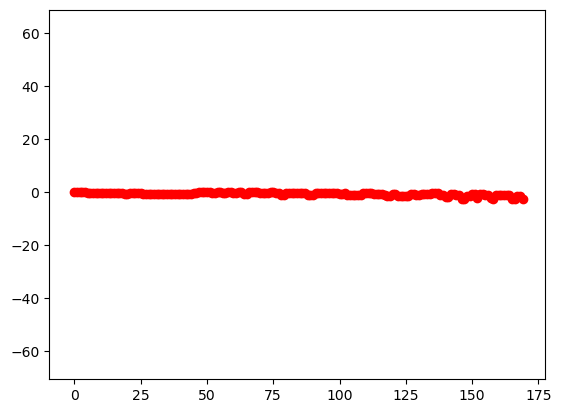

In [53]:
angle = [2*pi/100*i for i in range(101)]
radius = 1
x = [radius*cos(i) for i in angle]
y = [radius*sin(i) for i in angle]
# z=plt.scatter(eva_r)
plt.axis("equal")
plt.plot(x,y,omega,'ro')
plt.show()

C:\Users\yifan\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


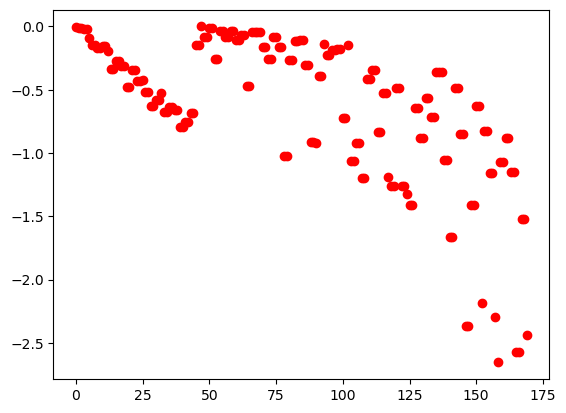

In [95]:
om=np.sort(omega2)
om1=np.sort(omega)
plt.plot(omega,'ro')
plt.show()

In [76]:
om

(170, 170)

## Break point 

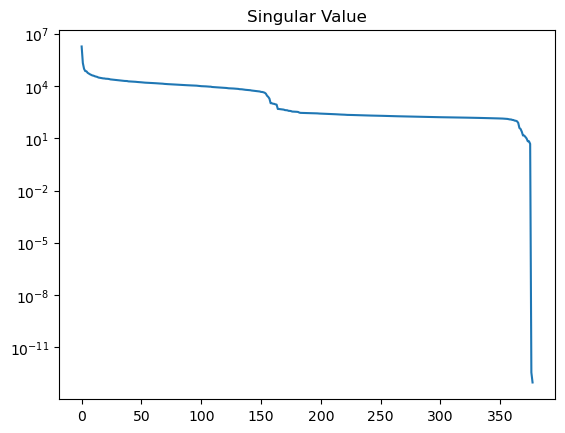

In [186]:
plt.figure(1)

plt.semilogy(S1) ## Find the truncation

plt.title('Singular Value')

plt.show()
  
# plt.ylim([10, 5100000])  
  
# plt.xlim([0, 365])